In [1]:
import pandas as pd
import local_config
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv')


In [2]:
# set up the dataset for new data

df["Sigma_Ratio"] = np.abs(df["Sigma_2"] / df["Sigma_1"])  # normalize sigmas

df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

# Save it back
df.to_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv', index=False)

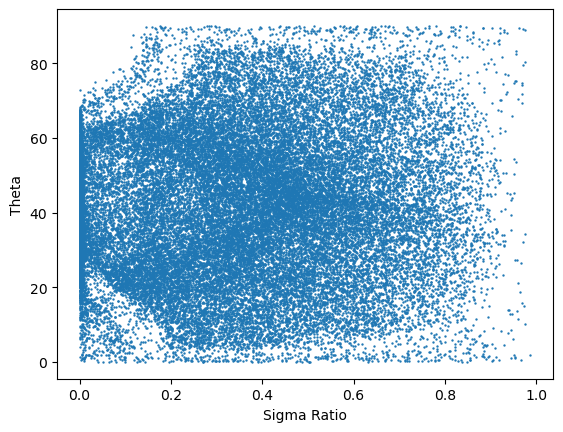

In [3]:
# thetas vs sigma ratio scatter

plt.scatter(df["Sigma_Ratio"], df["Theta"], s=0.5)
plt.xlabel("Sigma Ratio")
plt.ylabel("Theta")
plt.show()

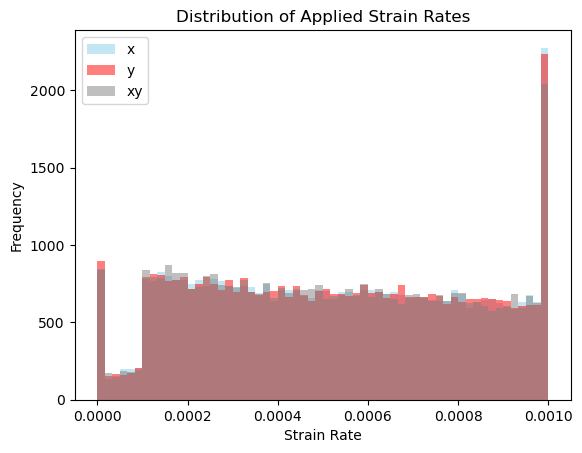

In [4]:
# strain rate histogram

plt.hist(df["Strain Rate x"], bins=60, color='skyblue', alpha=0.5, label='x')
plt.hist(df["Strain Rate y"], bins=60, color='red', alpha=0.5, label='y')
plt.hist(df["Strain Rate xy"], bins=60, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()

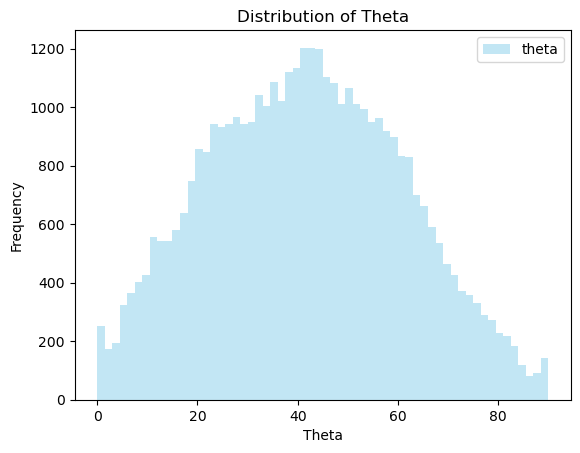

In [5]:
# Thetas histogram

plt.hist(df["Theta"], bins=60, color='skyblue', alpha=0.5, label='theta')

plt.xlabel("Theta")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Theta")
plt.show()

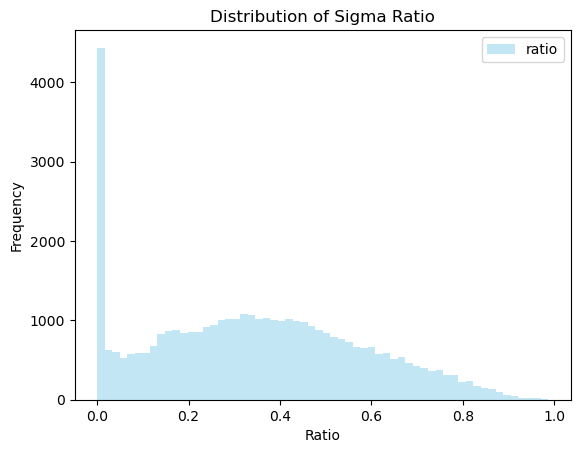

In [6]:
# ratios histogram

plt.hist(df["Sigma_Ratio"], bins=60, color='skyblue', alpha=0.5, label='ratio')

plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Sigma Ratio")
plt.show()

/tmp/ipykernel_1041386/142409332.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)


             0         1         2
0     0.000032  0.000151  0.000021
1     0.000307  0.000241  0.000908
2     0.000711  0.000186  0.000849
3     0.000849  0.000377  0.000782
4     0.000046  0.000747  0.000388
...        ...       ...       ...
4460  0.000133  0.000224  0.000592
4461  0.000267  0.000811  0.000900
4462  0.000640  0.000925  0.000199
4463  0.000238  0.000556  0.000704
4464  0.000010  0.000651  0.000932

[4465 rows x 3 columns]
157


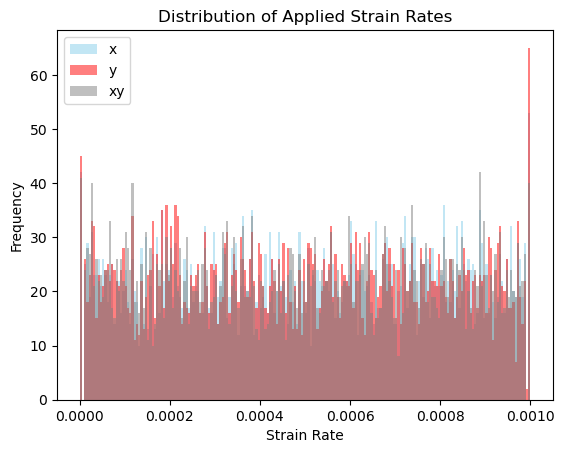

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)
print(df)

c = 0
for i in range(len(df)):
    if df[0][i] == 0.001 or df[1][i] == 0.001 or df[2][i] == 0.001:
        # print(df.iloc[i])
        c += 1

print(c)


plt.hist(df[0], bins=200, color='skyblue', alpha=0.5, label='x')
plt.hist(df[1], bins=200, color='red', alpha=0.5, label='y')
plt.hist(df[2], bins=200, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()